In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('games.csv')
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
data['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

<AxesSubplot:xlabel='victory_status', ylabel='count'>

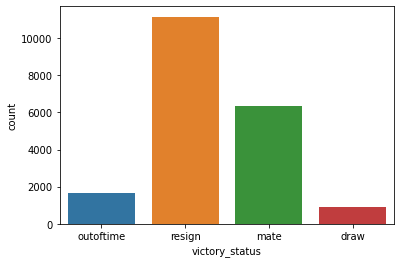

In [4]:
sns.countplot(x='victory_status',data=data)

In [5]:
data['opening'] = data['opening_name'].apply(lambda x:x.split(':')[0])

In [6]:
data['opening'].value_counts()

Sicilian Defense                                                     2573
French Defense                                                       1306
Queen's Pawn Game                                                    1059
Italian Game                                                          981
King's Pawn Game                                                      917
                                                                     ... 
King's Gambit Accepted |  Bishop's Gambit |  Bogoljubov Variation       1
Alekhine Defense #3                                                     1
King's Indian |  Orthodox |  7...Nbd7 8.Re1                             1
Danish Gambit Accepted |  Schlechter Defense                            1
King's Gambit |  Falkbeer Countergambit |  Miles Gambit                 1
Name: opening, Length: 227, dtype: int64

In [7]:
data['opening_name'].value_counts()

Van't Kruijs Opening                                              368
Sicilian Defense                                                  358
Sicilian Defense: Bowdler Attack                                  296
Scotch Game                                                       271
French Defense: Knight Variation                                  271
                                                                 ... 
Sicilian Defense: Kupreichik Variation                              1
Modern Defense: Lizard Defense |  Mittenberger Gambit               1
French Defense: Rubinstein Variation |  Kasparov Attack             1
French Defense: Tarrasch Variation |  Open System |  Main Line      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation        1
Name: opening_name, Length: 1477, dtype: int64

In [8]:
aux = pd.DataFrame(data['opening'].value_counts().head(10))
aux['nomes'] = aux.index

Sicilian Defense        2573
French Defense          1306
Queen's Pawn Game       1059
Italian Game             981
King's Pawn Game         917
Ruy Lopez                858
English Opening          720
Scandinavian Defense     716
Caro-Kann Defense        593
Scotch Game              465
Name: opening, dtype: int64

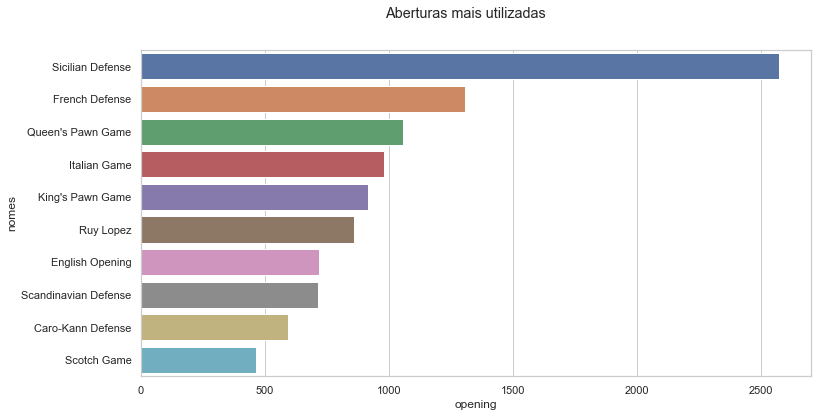

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(y=aux['nomes'], x=aux['opening'])
plt.suptitle("Aberturas mais utilizadas")
data['opening'].value_counts().head(10)

In [10]:
data['first_mov'] = data['moves'].apply(lambda x:x.split()[0:2])

In [11]:
data['first_mov'] = data['first_mov'].apply(lambda x:','.join(x))

In [12]:
aux = pd.DataFrame(data['first_mov'].value_counts().head(10))
aux['moves'] = aux.index

e4,e5     6029
e4,c5     2581
d4,d5     2185
e4,e6     1351
d4,Nf6    1138
e4,d5      809
e4,c6      556
d4,e6      433
e4,d6      345
c4,e5      279
Name: first_mov, dtype: int64

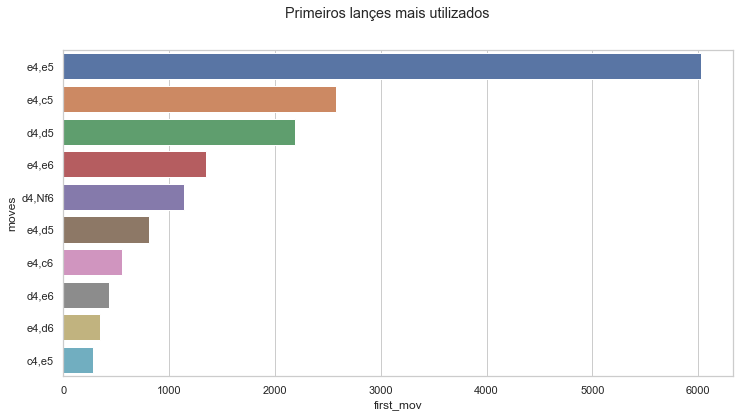

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(y=aux['moves'], x=aux['first_mov'])
plt.suptitle("Primeiros lançes mais utilizados")
data['first_mov'].value_counts().head(10)